In [448]:
import pandas as pd
import numpy as np
import seaborn as sb
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Imputer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [408]:
#Arquivos disponiveis em: https://archive.ics.uci.edu/ml/datasets/Post-Operative+Patient

#Data Frame do conjuto de treinamento
pos = pd.read_csv(r'''C:\Users\Cleityanne\Downloads\Lincoln\dataset.csv''')
pos.head()

,mid,low,excellent,mid.1,stable,stable.1,stable.2,15,A
0,mid,high,excellent,high,stable,stable,stable,10,S
1,high,low,excellent,high,stable,stable,mod-stable,10,A
2,mid,low,good,high,stable,unstable,mod-stable,15,A
3,mid,mid,excellent,high,stable,stable,stable,10,A
4,high,low,good,mid,stable,stable,unstable,15,S


In [409]:
#Análise Exploratória de Dados
pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
mid          89 non-null object
low          89 non-null object
excellent    89 non-null object
mid.1        89 non-null object
stable       89 non-null object
stable.1     89 non-null object
stable.2     89 non-null object
15           89 non-null object
A            89 non-null object
dtypes: object(9)
memory usage: 6.3+ KB


In [410]:
#Renomeando as colunas
pos.columns = ['temp_interna', 'temp_externa', 'saturacao_O', 'pressao_Art','estabilidade_temp_externa','estabilidade_temp_interna','estabilidade_pressao_Art','Conforto', 'Classe']

In [411]:
pos.columns

Index(['temp_interna', 'temp_externa', 'saturacao_O', 'pressao_Art',
       'estabilidade_temp_externa', 'estabilidade_temp_interna',
       'estabilidade_pressao_Art', 'Conforto', 'Classe'],
      dtype='object')

In [412]:
pos.describe

<bound method NDFrame.describe of    temp_interna temp_externa saturacao_O pressao_Art  \
0           mid         high   excellent        high   
1          high          low   excellent        high   
2           mid          low        good        high   
3           mid          mid   excellent        high   
4          high          low        good         mid   
5           mid          low   excellent        high   
6          high          mid   excellent         mid   
7           mid         high        good         mid   
8           mid          low   excellent         mid   
9           mid          mid        good         mid   
10          mid          low        good        high   
11         high         high   excellent        high   
12          mid         high        good         mid   
13          mid          low        good        high   
14         high         high   excellent        high   
15          low         high        good        high   
16          mi

In [413]:
# Resolvendo o erro da linha 2 e coluna Classe
# Erro de digitação sendo "A " em vez de "A"

#Aplicando uma função que substitui "A " por "A"
    pos.Classe.apply(lambda x: x.replace("A ", "A"))
pos[ pos.Conforto == 'A '] = pos[ pos.Conforto == 'A']

IndentationError: unexpected indent (<ipython-input-413-b797f9b208ee>, line 5)

In [414]:
# Análise Descritiva
total = pos.count()
soma = pos.sum()
maximo = pos.max()
minimo = pos.min()
media = pos.mean()
mediana = pos.median()
variancia = pos.var()
desvio_padrao = pos.std()
print (pos.describe())

       temp_interna temp_externa saturacao_O pressao_Art  \
count            89           89          89          89   
unique            3            3           2           3   
top             mid          mid        good         mid   
freq             57           48          47          56   

       estabilidade_temp_externa estabilidade_temp_interna  \
count                         89                        89   
unique                         2                         3   
top                     unstable                    stable   
freq                          45                        82   

       estabilidade_pressao_Art Conforto Classe  
count                        89       89     89  
unique                        3        5      3  
top                      stable       10      A  
freq                         45       65     63  


In [415]:
#Verificando se exite algum valor nulo
pos.isnull().sum()

temp_interna                 0
temp_externa                 0
saturacao_O                  0
pressao_Art                  0
estabilidade_temp_externa    0
estabilidade_temp_interna    0
estabilidade_pressao_Art     0
Conforto                     0
Classe                       0
dtype: int64

In [416]:
# filtrando os dados ..
pos[ pos.Conforto == '?'].head(5)


,temp_interna,temp_externa,saturacao_O,pressao_Art,estabilidade_temp_externa,estabilidade_temp_interna,estabilidade_pressao_Art,Conforto,Classe
45,low,mid,good,high,unstable,stable,stable,?,I
47,high,high,excellent,high,stable,stable,unstable,?,A
69,mid,low,excellent,mid,unstable,unstable,unstable,?,A


In [102]:
pos[ pos.Conforto == '?'] = "NaN"

In [103]:
pos.head(80)

,temp_interna,temp_externa,saturacao_O,pressao_Art,estabilidade_temp_externa,estabilidade_temp_interna,estabilidade_pressao_Art,Conforto,Classe
0,mid,high,excellent,high,stable,stable,stable,10,S
1,high,low,excellent,high,stable,stable,mod-stable,10,A
2,mid,low,good,high,stable,unstable,mod-stable,15,A
3,mid,mid,excellent,high,stable,stable,stable,10,A
4,high,low,good,mid,stable,stable,unstable,15,S
5,mid,low,excellent,high,stable,stable,mod-stable,5,S
6,high,mid,excellent,mid,unstable,unstable,stable,10,S
7,mid,high,good,mid,stable,stable,stable,10,S
8,mid,low,excellent,mid,unstable,stable,mod-stable,10,S
9,mid,mid,good,mid,stable,stable,stable,15,A


In [104]:
pos = pos.drop(45, axis=0)
pos = pos.drop(47, axis=0)
pos = pos.drop(69, axis=0)

In [417]:
#Transforma os valores "?" em "NaN"
pos = pos.apply(lambda x: x.replace('?',np.nan))

In [418]:
pos.head(50)

,temp_interna,temp_externa,saturacao_O,pressao_Art,estabilidade_temp_externa,estabilidade_temp_interna,estabilidade_pressao_Art,Conforto,Classe
0,mid,high,excellent,high,stable,stable,stable,10,S
1,high,low,excellent,high,stable,stable,mod-stable,10,A
2,mid,low,good,high,stable,unstable,mod-stable,15,A
3,mid,mid,excellent,high,stable,stable,stable,10,A
4,high,low,good,mid,stable,stable,unstable,15,S
5,mid,low,excellent,high,stable,stable,mod-stable,05,S
6,high,mid,excellent,mid,unstable,unstable,stable,10,S
7,mid,high,good,mid,stable,stable,stable,10,S
8,mid,low,excellent,mid,unstable,stable,mod-stable,10,S
9,mid,mid,good,mid,stable,stable,stable,15,A


In [431]:
# Verificando valores nulos para o atributo Conforto 
pos.Conforto.isnull().sum()

0

In [420]:
pos.head(50)

,temp_interna,temp_externa,saturacao_O,pressao_Art,estabilidade_temp_externa,estabilidade_temp_interna,estabilidade_pressao_Art,Conforto,Classe
0,mid,high,excellent,high,stable,stable,stable,10,S
1,high,low,excellent,high,stable,stable,mod-stable,10,A
2,mid,low,good,high,stable,unstable,mod-stable,15,A
3,mid,mid,excellent,high,stable,stable,stable,10,A
4,high,low,good,mid,stable,stable,unstable,15,S
5,mid,low,excellent,high,stable,stable,mod-stable,05,S
6,high,mid,excellent,mid,unstable,unstable,stable,10,S
7,mid,high,good,mid,stable,stable,stable,10,S
8,mid,low,excellent,mid,unstable,stable,mod-stable,10,S
9,mid,mid,good,mid,stable,stable,stable,15,A


In [428]:
# preenche valores NaN com a mediana da coluna Conforto
pos.Conforto = pos.Conforto.fillna(pos.Conforto.median()) 

In [429]:
#Verificando novemente se tem valores nulos
pos.isnull().sum()

temp_interna                 0
temp_externa                 0
saturacao_O                  0
pressao_Art                  0
estabilidade_temp_externa    0
estabilidade_temp_interna    0
estabilidade_pressao_Art     0
Conforto                     0
Classe                       0
dtype: int64

In [435]:
#Transformar Dados Categóricos em Dados Numéricos.
encoder = LabelEncoder()

#adiconando +1 em cada atributo para verificar todos.
# low = 1; mid = 2; high = 3.
#high (> 37), mid (>= 36 and <= 37), low (< 36) 
pos.temp_interna = encoder.fit_transform(pos.temp_interna.values)+1

#high (> 36.5), mid (>= 36.5 and <= 35), low (< 35) 
pos.temp_externa = encoder.fit_transform(pos.temp_externa.values)+1

#high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70) 
pos.pressao_Art = encoder.fit_transform(pos.pressao_Art.values)+1

# unstable = 1, mod-stable = 2, stable = 3.(estável, moderado, instável)
pos.estabilidade_temp_interna = encoder.fit_transform(pos.estabilidade_temp_interna.values)+1
pos.estabilidade_temp_externa = encoder.fit_transform(pos.estabilidade_temp_externa.values)+1

pos.estabilidade_pressao_Art = encoder.fit_transform(pos.estabilidade_pressao_Art.values)+1

# good = 1; excellent = 2; juto = 3; pobre = 4.
#excellent (>= 98), good (>= 90 and < 98), fair (>= 80 and < 90), poor (< 80) 
pos.saturacao_O = encoder.fit_transform(pos.saturacao_O.values)+1

# I (paciente enviado para Unidade de Terapia Intensiva);
# S (paciente preparado para ir para casa);
# A (paciente enviado para o hospital geral).

# A = 1; I = 2; S = 3.
pos.Classe = encoder.fit_transform(pos.Classe.values)+1

#Conforto percebido pelo paciente na alta, medido como um inteiro entre 0 e 20

#visualizazndo o dataset alterado.
pos.head(50)

,temp_interna,temp_externa,saturacao_O,pressao_Art,estabilidade_temp_externa,estabilidade_temp_interna,estabilidade_pressao_Art,Conforto,Classe
0,3,1,1,1,1,2,2,10,3
1,1,2,1,1,1,2,1,10,1
2,3,2,2,1,1,3,1,15,1
3,3,3,1,1,1,2,2,10,1
4,1,2,2,3,1,2,3,15,3
5,3,2,1,1,1,2,1,05,3
6,1,3,1,3,2,3,2,10,3
7,3,1,2,3,1,2,2,10,3
8,3,2,1,3,2,2,1,10,3
9,3,3,2,3,1,2,2,15,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002868559F4A8>]],
      dtype=object)

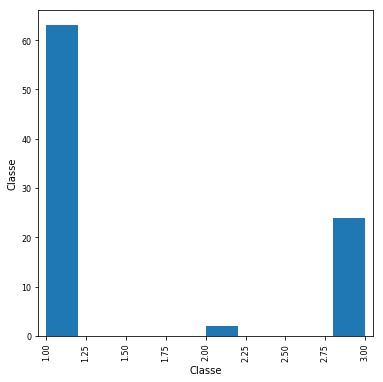

In [437]:
pd.plotting.scatter_matrix(pos[['Conforto', 'Classe']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028681F90630>,
      dtype=object)

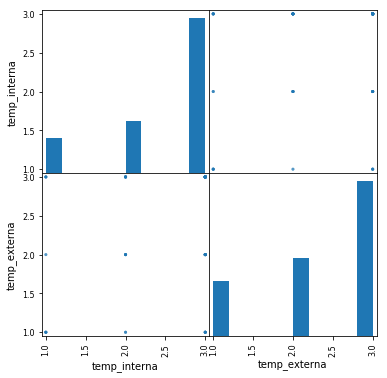

In [438]:
pd.plotting.scatter_matrix(pos[['temp_interna', 'temp_externa']], figsize=(6,6))

In [439]:
pos_treino = pd.DataFrame(scaled_features,columns=pos.columns[:-1])
pos_treino.head()

,temp_interna,temp_externa,saturacao_O,pressao_Art,estabilidade_temp_externa,estabilidade_temp_interna,estabilidade_pressao_Art,Conforto
0,0.686723,-1.727737,-1.057850,-1.376678,-1.0113,-0.204465,-0.031976,-0.388058
1,-2.029648,-0.446332,-1.057850,-1.376678,-1.0113,-0.204465,-1.454930,-0.388058
2,0.686723,-0.446332,0.945313,-1.376678,-1.0113,3.435015,-1.454930,1.854616
3,0.686723,0.835073,-1.057850,-1.376678,-1.0113,-0.204465,-0.031976,-0.388058
4,-2.029648,-0.446332,0.945313,0.754180,-1.0113,-0.204465,1.390977,1.854616


In [472]:
#Separa os dados em treinamento(75%) e teste(25%)
X = pos_treino
y = pos['Classe']
X_treino, X_teste, y_treino, y_teste = train_test_split(pos, pos['Classe'])

In [473]:
y_teste

53    1
6     3
43    1
64    3
63    1
47    1
82    1
61    1
81    2
22    1
11    1
69    1
46    1
66    1
73    1
29    1
34    1
54    1
62    3
18    1
20    3
67    1
86    1
Name: Classe, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000286FF8A1668>]],
      dtype=object)

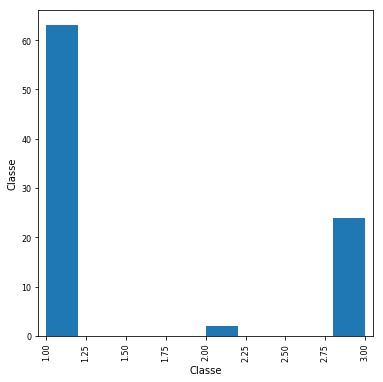

In [460]:
pd.plotting.scatter_matrix(pos[['Conforto', 'Classe']], figsize=(6,6))

Text(0.5,1,'temperatura interna vs temperatura externa')

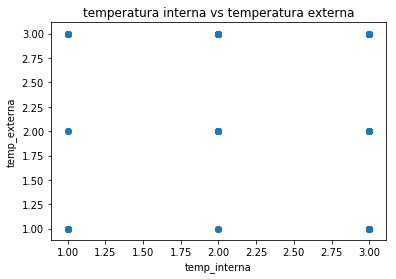

In [461]:
plt.scatter(pos.temp_interna, pos.temp_externa)
plt.xlabel('temp_interna')
plt.ylabel('temp_externa')
plt.title('temperatura interna vs temperatura externa')

In [462]:
# Correlação entre todas as colunas
pos.corr()

,temp_interna,temp_externa,saturacao_O,pressao_Art,estabilidade_temp_externa,estabilidade_temp_interna,estabilidade_pressao_Art,Classe
temp_interna,1.000000,0.228287,0.053926,0.099929,-0.038068,-0.081750,-0.130046,0.004837
temp_externa,0.228287,1.000000,-0.126059,0.106517,-0.134604,0.118343,0.067677,0.090717
saturacao_O,0.053926,-0.126059,1.000000,0.078407,0.100658,-0.134378,-0.033826,0.040518
pressao_Art,0.099929,0.106517,0.078407,1.000000,0.116221,-0.020071,0.211494,0.126875
estabilidade_temp_externa,-0.038068,-0.134604,0.100658,0.116221,1.000000,0.120389,0.095576,-0.007123
estabilidade_temp_interna,-0.081750,0.118343,-0.134378,-0.020071,0.120389,1.000000,0.109840,0.147232
estabilidade_pressao_Art,-0.130046,0.067677,-0.033826,0.211494,0.095576,0.109840,1.000000,0.033849
Classe,0.004837,0.090717,0.040518,0.126875,-0.007123,0.147232,0.033849,1.000000


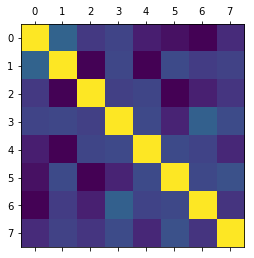

In [463]:
# Correlação entre as variáveis
plt.matshow(pos.corr())

In [474]:
X_teste.corr()

,temp_interna,temp_externa,saturacao_O,pressao_Art,estabilidade_temp_externa,estabilidade_temp_interna,estabilidade_pressao_Art,Classe
temp_interna,1.000000,0.440122,0.559851,0.080117,-0.310580,-0.321945,-0.219995,-0.033993
temp_externa,0.440122,1.000000,0.412047,0.218521,0.149453,0.078567,-0.063914,0.103695
saturacao_O,0.559851,0.412047,1.000000,0.143105,-0.195336,-0.310530,-0.106035,-0.060718
pressao_Art,0.080117,0.218521,0.143105,1.000000,0.182323,0.256174,0.019847,-0.155635
estabilidade_temp_externa,-0.310580,0.149453,-0.195336,0.182323,1.000000,0.339683,0.006141,-0.124534
estabilidade_temp_interna,-0.321945,0.078567,-0.310530,0.256174,0.339683,1.000000,0.225969,0.139315
estabilidade_pressao_Art,-0.219995,-0.063914,-0.106035,0.019847,0.006141,0.225969,1.000000,0.206779
Classe,-0.033993,0.103695,-0.060718,-0.155635,-0.124534,0.139315,0.206779,1.000000


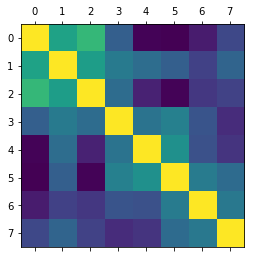

In [475]:
# Correlação entre as variáveis
plt.matshow(X_teste.corr())

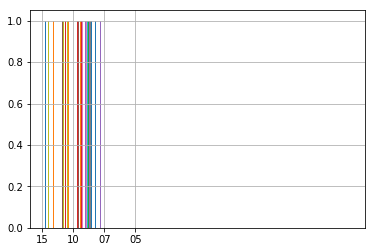

In [476]:
# Histograma da coluna Conforto
# histograma pode ser um gráfico por valores absolutos, frequência relativa ou densidade.
X_treino.Conforto.hist()

Text(0.5,1,'Dados de treinamento de histograma de temperatura')

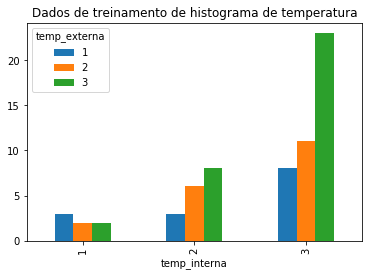

In [477]:
X_treino.groupby(['temp_interna', 'temp_externa']).size().unstack().plot(kind='bar').set_title('Dados de treinamento de histograma de temperatura')

Text(0.5,1,'Dados de treinamento de histograma dos pacientes')

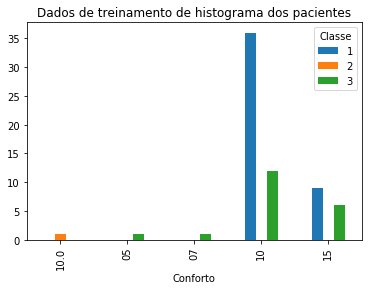

In [478]:
# I (paciente enviado para Unidade de Terapia Intensiva);
# S (paciente preparado para ir para casa);
# A (paciente enviado para o hospital geral).
# A = 1; I = 2; S = 3.
# Conforto percebido pelo paciente na alta, medido como um inteiro entre 0 e 20

X_treino.groupby(['Conforto',"Classe"]).size().unstack().plot(kind='bar').set_title('Dados de treinamento de histograma dos pacientes')

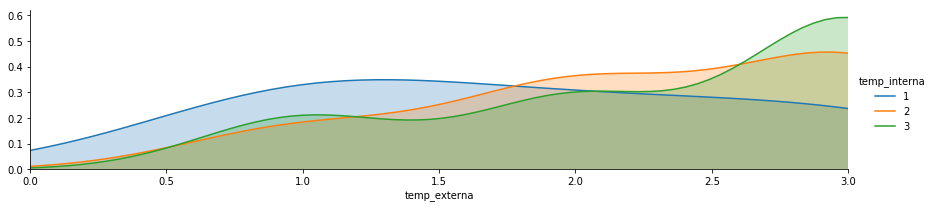

In [479]:
facet = sb.FacetGrid(X_treino, hue='temp_interna', aspect=4)
facet.map(sb.kdeplot, 'temp_externa', shade=True)
facet.set(xlim=(0, X_treino.temp_externa.max()))
facet.add_legend()

In [480]:
# Verificando valores nulos para o treinameto 
X_treino.isnull().sum()

temp_interna                 0
temp_externa                 0
saturacao_O                  0
pressao_Art                  0
estabilidade_temp_externa    0
estabilidade_temp_interna    0
estabilidade_pressao_Art     0
Conforto                     0
Classe                       0
dtype: int64

In [481]:
# Verificando valores nulos para o treinameto 
y_treino.isnull().sum()

0

In [482]:
# Verificando valores nulos para o teste
X_teste.isnull().sum()

temp_interna                 0
temp_externa                 0
saturacao_O                  0
pressao_Art                  0
estabilidade_temp_externa    0
estabilidade_temp_interna    0
estabilidade_pressao_Art     0
Conforto                     0
Classe                       0
dtype: int64

In [483]:
# Verificando valores nulos para o teste
y_teste.isnull().sum()

0

In [484]:
X_treino.corr()

,temp_interna,temp_externa,saturacao_O,pressao_Art,estabilidade_temp_externa,estabilidade_temp_interna,estabilidade_pressao_Art,Classe
temp_interna,1.000000,0.166622,-0.187409,0.118007,0.090636,0.085786,-0.074528,0.006265
temp_externa,0.166622,1.000000,-0.268188,0.062951,-0.237419,0.111349,0.066275,0.108219
saturacao_O,-0.187409,-0.268188,1.000000,0.071959,0.219344,-0.019013,0.038321,0.046589
pressao_Art,0.118007,0.062951,0.071959,1.000000,0.088707,-0.165509,0.258128,0.218025
estabilidade_temp_externa,0.090636,-0.237419,0.219344,0.088707,1.000000,0.003760,0.104540,0.037058
estabilidade_temp_interna,0.085786,0.111349,-0.019013,-0.165509,0.003760,1.000000,0.013366,0.186444
estabilidade_pressao_Art,-0.074528,0.066275,0.038321,0.258128,0.104540,0.013366,1.000000,0.025987
Classe,0.006265,0.108219,0.046589,0.218025,0.037058,0.186444,0.025987,1.000000


In [485]:
y_teste.tail()

62    3
18    1
20    3
67    1
86    1
Name: Classe, dtype: int64

In [486]:
# Localizar linhas com valores nulos ...
y_teste [y_teste.isnull()]

Series([], Name: Classe, dtype: int64)

In [487]:
#Ajustar os dados dos recursos somente para este estimador (deixando a coluna Classe) e transformar
scaler = StandardScaler()
scaler.fit(pos.drop('Classe',axis=1))
scaled_features = scaler.transform(pos.drop('Classe',axis=1))

In [488]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_treino,y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [489]:
pred = knn.predict(X_teste)

In [490]:
#Avaliação da qualidade de classificação
matriz = confusion_matrix(y_teste, pred)
print(matriz)

[[17  0  1]
 [ 1  0  0]
 [ 0  2  2]]


In [497]:
print(classification_report(y_teste, pred))

             precision    recall  f1-score   support

          1       0.94      0.94      0.94        18
          2       0.00      0.00      0.00         1
          3       0.67      0.50      0.57         4

avg / total       0.86      0.83      0.84        23



In [501]:
pred = knn.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [499]:
print("Taxa de erro de classificação incorreta: ",round(np.mean(pred!=y_teste),3))

Taxa de erro de classificação incorreta:  0.174


In [493]:
#Escolhendo 'k' pelo método
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_treino,y_treino)
    pred_i = knn.predict(X_teste)
    error_rate.append(np.mean(pred_i != y_teste))

Text(0,0.5,'Taxa de Erro (erro de classificação)')

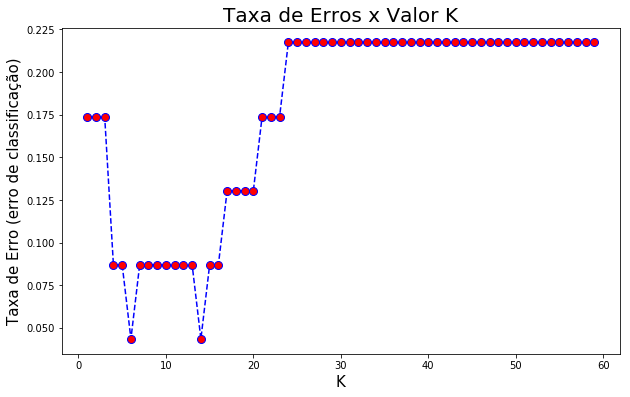

In [496]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Taxa de Erros x Valor K', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Taxa de Erro (erro de classificação)', fontsize=15)